# The Empirical Mode Decomposition
The Empirical Mode Decomposition (EMD) has been proposed as a fundamental part of the Hilbert–Huang transform (HHT). Hilbert Huang's transform was supposedly carried out in two stages. First, using the algorithm, we obtain intrinsic mode functions (IMF). Then, in the second stage, the instantaneous frequency spectrum of the initial sequence is obtained by applying the Hilbert transform to the results of the step above. HHT allows obtaining the instantaneous frequency spectrum of non-linear and non-stationary sequences

In [ ]:
! pip install EMD-signal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


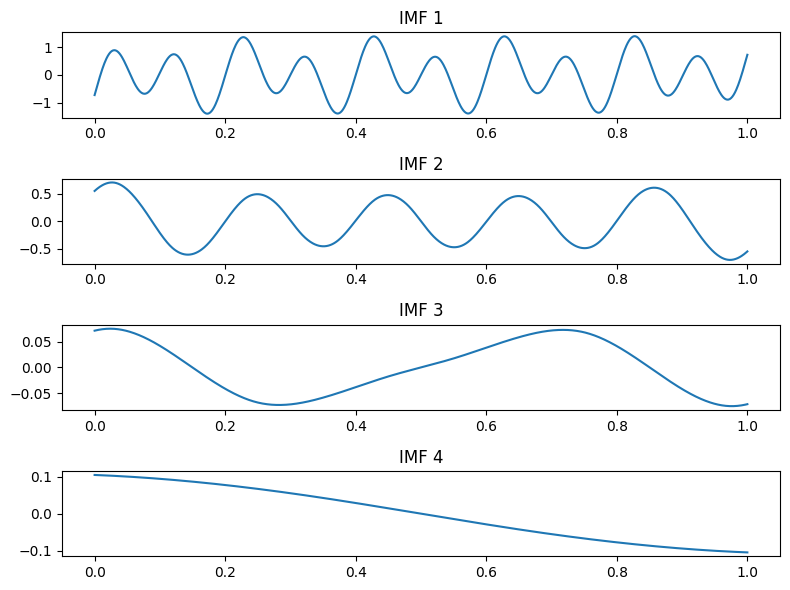

In [ ]:
import numpy as np
from PyEMD import EMD
import matplotlib.pyplot as plt

# Gerando uma série temporal de exemplo
np.random.seed(0)
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 10 * t)

# Configurando a EMD
emd = EMD()

# Decomposição da série temporal em IMFs
IMFs = emd(signal)

# Plotando as IMFs
plt.figure(figsize=(8, 6))
for i, imf in enumerate(IMFs):
    plt.subplot(len(IMFs), 1, i+1)
    plt.plot(t, imf)
    plt.title(f'IMF {i+1}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("MDA8.csv")
target = data['MDA8'].values

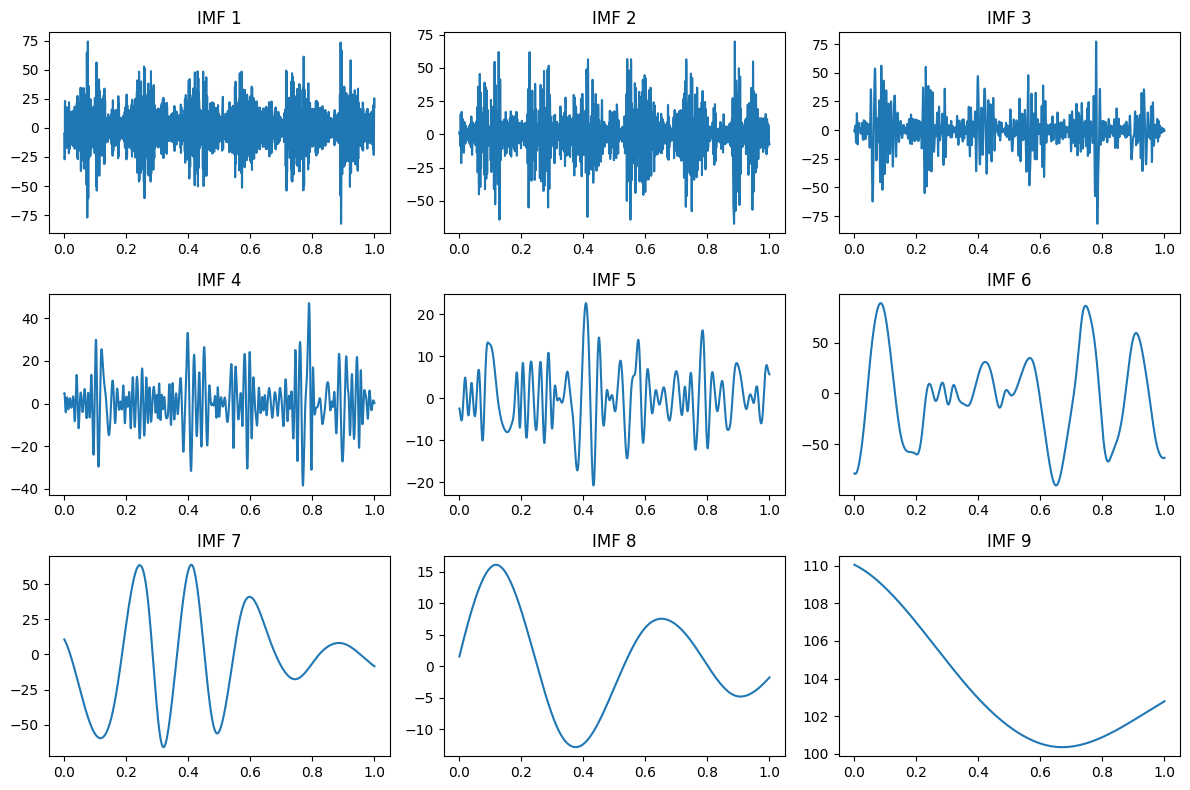

In [ ]:
# Configurando a EMD
emd = EMD()

# Decomposição da série temporal em IMFs
IMFs = emd(target)
t = np.linspace(0, 1, target.size)


# Plotando as IMFs em uma matriz 3x3 de subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    if i < len(IMFs):
        ax.plot(t, IMFs[i])
        ax.set_title(f'IMF {i+1}')

# Remova quaisquer subplots não utilizados
for i in range(len(IMFs), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

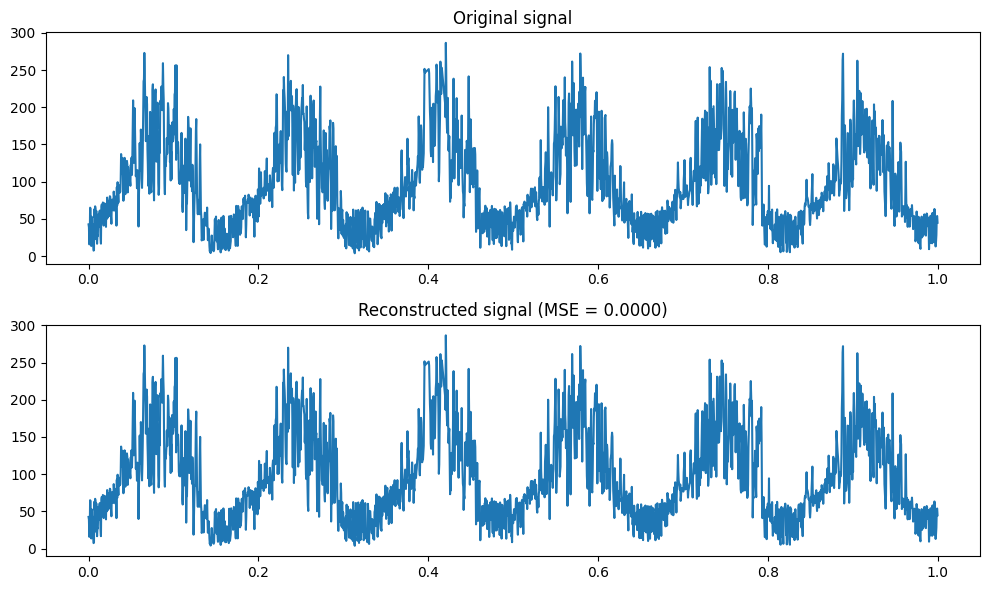

In [ ]:
# Realizando a reconstrução inversa
reconstructed_signal = np.sum(IMFs, axis=0)

# Calculando o MSE entre o sinal original e o sinal reconstruído
mse = np.mean((target - reconstructed_signal) ** 2)

# Plotando o sinal original e o sinal reconstruído
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, target)
plt.title('Original signal')

plt.subplot(2, 1, 2)
plt.plot(t, reconstructed_signal)
plt.title(f'Reconstructed signal (MSE = {mse:.4f})')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluation(test, predicted):
    # Calculating and printing the R2 value
    r2 = r2_score(test, predicted)
    print("R2 Value of sequential model:", round(r2, 3))

    # Calculating and printing the MAE score
    mae = mean_absolute_error(test, predicted)
    print("Mean Absolute Error:", round(mae, 2))

    # Calculating and printing the MSE score
    mse = mean_squared_error(test, predicted)
    print("Mean Squared Error:", round(mse, 2))

In [ ]:
evaluation(target, reconstructed_signal)